# Demo : SVD
In this demo we work with data digit image
-   How to use SVD
-   Visualize the result

In [1]:
# Load data
from sklearn import datasets
digits = datasets.load_digits()

In [2]:
## Total number of sample in this 
n_samples = len(digits.images)
print("Total number of sample in this dataset: ", n_samples)
## Label type:
print("Label of first sample: ", digits.target[0])

Total number of sample in this dataset:  1797
Label of first sample:  0


In [3]:
import numpy as np
X_images = digits.images
y_labels = digits.target
X_images = np.array(X_images)
y_labels = np.array(y_labels)

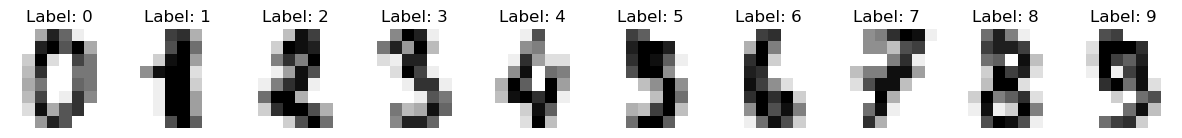

In [5]:
from matplotlib import pyplot as plt
# Visualize one sample of each class
_, indices = np.unique(y_labels,return_index=True) # get one index of each class
# Plot
_, axes = plt.subplots(nrows = 1,
                       ncols = len(indices),
                       figsize = (15,6))
for i in range(len(indices)):
    index = indices[i]
    axes[i].set_axis_off()
    axes[i].imshow(X_images[index], cmap = plt.cm.gray_r, interpolation= "nearest")
    axes[i].set_title(f"Label: {y_labels[index]}")

In [12]:
# Using SVD to each image:
u_X,e_X,v_X = np.linalg.svd(X_images,full_matrices=False)

In [13]:
print(u_X.shape)
print(e_X.shape)
print(v_X.shape)


(1797, 8, 8)
(1797, 8)
(1797, 8, 8)


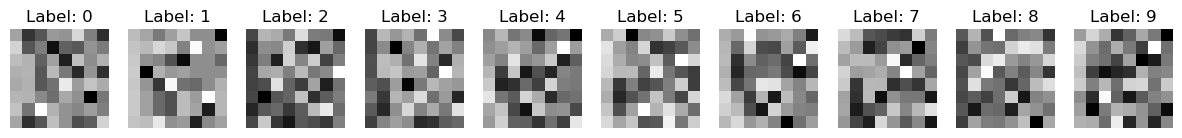

In [14]:
# Plot u of one image in each class
_, axes = plt.subplots(nrows = 1,
                       ncols = len(indices),
                       figsize = (15,6))
for i in range(len(indices)):
    index = indices[i]
    axes[i].set_axis_off()
    axes[i].imshow(u_X[index], cmap = plt.cm.gray_r, interpolation= "nearest")
    axes[i].set_title(f"Label: {y_labels[index]}")

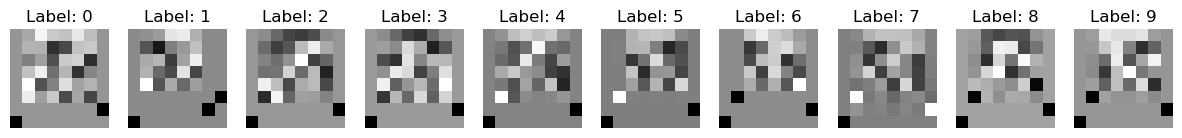

In [15]:
# Plot v of one image in each class
_, axes = plt.subplots(nrows = 1,
                       ncols = len(indices),
                       figsize = (15,6))
for i in range(len(indices)):
    index = indices[i]
    axes[i].set_axis_off()
    axes[i].imshow(v_X[index], cmap = plt.cm.gray_r, interpolation= "nearest")
    axes[i].set_title(f"Label: {y_labels[index]}")

# SVD note:
We can use SVD to calculate a projection of a dataset and select a number of dimensions or principal components of the projection to use as input to model.

The scikit-learn library provides the TruncatedSVD class that can be fit on a dataset and used to transform a training dataset and any additional dataset in the future.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
X_train,X_test,y_train,y_test = train_test_split(X_images,
                                                 y_labels,
                                                 test_size = 0.2,
                                                 shuffle = False)

In [32]:
X_train.reshape((len(X_train),-1)).shape
print(y_train.shape)


(1437,)


In [33]:
# n_components the number of dimensional after transforming
svd_transform = TruncatedSVD(n_components=2)
svd_transform.fit(X_train.reshape((len(X_train),-1)),y_train)

X_train_transformed = svd_transform.transform(X_train.reshape((len(X_train),-1)))

In [34]:
X_train_transformed.shape

(1437, 2)

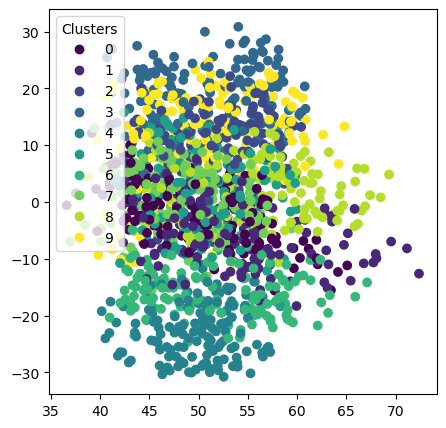

In [35]:
# Visualize results:

fig,ax = plt.subplots(1,1,figsize = (5,5))
scatter = ax.scatter(X_train_transformed[:,0],X_train_transformed[:,1],c = y_train)

ax.legend(*scatter.legend_elements(),loc = 'upper left',title="Clusters")